# **Project 2**, APS1070 Fall 2021
**Anomaly Detection Algorithm using Gaussian Mixture Model [13 Marks]**

**Deadline: OCT 22, 9 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: **Haozhe Wang**
*   Student Number: 

##**Part 1: Getting started [1.5 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? ___284807___ **[0.1]**
* What features in the dataset are present aside from the 28 main features?  ___Time, Amount___ **[0.1]**
* Which column contains the targets? __Class__ **[0.1]**
* To what do the target values correspond? __0 represent nomal(non-fraud), 1 represent anomaly(fraud)__ **[0.1]**

**Solution:**

**1. 284807**

**2. Time, Amount**

**3. 0 represent nomal(non-fraud), 1 represent anomaly(fraud).**

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=484437cbd1d74691be58b2f498e1bf2d559e7ce292b1e0d4ac6eb32a678ac14b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
### YOUR CODE HERE ###
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



* What is the percentage of entries in the dataset for each class? ____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.2]**



**Solution:**

**1. Non-fraud:99.827%, Fraud:0.173%**

**2. Unbalanced. Because generally-speaking there will be far more nomal and legal transactions between credit cards than anomalous and fraud transactions.**

**3. Yes. Many learning algorithm will do learning and prediction in favor of the major class when applied to an unbalanced dataset, while KNN will be in favor of certain anomaly data, which would works better in the unbalanced dataset like the credit card fraud data.**

In [ ]:
### YOUR CODE HERE ###
NonfraudNum = len(df[df['Class']==0])
FraudNum = len(df[df['Class']==1])
print('Non-fraud:',NonfraudNum,' Percentage:',NonfraudNum/(NonfraudNum + FraudNum))
print('Fraud:',FraudNum,' Percentage:',FraudNum/(NonfraudNum + FraudNum))

Non-fraud: 284315  Percentage: 0.9982725143693799
Fraud: 492  Percentage: 0.001727485630620034


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
y = df['Class']
X = df.drop(['Class','Amount','Time'], axis = 1)
feature_name = df.columns.drop(['Class','Amount','Time'])

X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

creditFraud_trainset = pd.DataFrame(X_train, columns=feature_name)
creditFraud_valset = pd.DataFrame(X_val, columns=feature_name)
creditFraud_testset = pd.DataFrame(X_test, columns=feature_name)

creditFraud_valset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000,42721.000000
mean,0.000121,0.008348,0.010318,-0.004160,0.006720,-0.006754,0.001886,0.000675,0.004131,0.000333,0.000219,0.006327,-0.002994,0.003613,-0.004006,0.001950,0.001198,0.000841,-0.000204,-0.001179,-0.000848,-0.001464,0.001882,0.001421,-0.001258,0.001923,0.000424,-0.001936
std,1.928910,1.623515,1.482909,1.405776,1.365714,1.320418,1.196326,1.186889,1.089544,1.076960,1.016884,0.993409,0.990222,0.949138,0.911868,0.863912,0.812462,0.832581,0.815135,0.753595,0.741308,0.720840,0.606737,0.606423,0.522837,0.484285,0.393627,0.319081
min,-34.591213,-60.464618,-27.747084,-5.683171,-32.092129,-21.248752,-21.926934,-50.943369,-7.175097,-16.746044,-4.110261,-18.553697,-3.888606,-18.493773,-3.918266,-12.427961,-20.159047,-7.552789,-6.938297,-25.222345,-22.665685,-9.499423,-32.828995,-2.836627,-8.696627,-2.604551,-8.878665,-8.412267
25%,-0.914912,-0.587153,-0.877588,-0.845997,-0.691670,-0.768164,-0.554242,-0.206958,-0.633833,-0.535190,-0.759899,-0.398055,-0.644410,-0.425622,-0.582579,-0.468771,-0.482501,-0.497981,-0.459142,-0.212028,-0.225828,-0.535174,-0.159958,-0.352224,-0.319211,-0.326023,-0.070612,-0.053238
50%,0.017169,0.072405,0.185100,-0.027721,-0.057158,-0.281124,0.042350,0.022869,-0.054766,-0.094437,-0.032925,0.146358,-0.013037,0.049595,0.038740,0.064484,-0.070347,-0.003336,0.000595,-0.062540,-0.031530,0.005746,-0.011707,0.042760,0.013301,-0.047547,0.001617,0.011162
75%,1.313281,0.806329,1.030409,0.735695,0.622010,0.392366,0.572380,0.326421,0.598643,0.435324,0.742938,0.620733,0.655754,0.491046,0.645712,0.524001,0.392412,0.499560,0.457749,0.133575,0.181843,0.517722,0.148877,0.443146,0.350829,0.241518,0.091442,0.077728
max,2.446505,14.845545,4.079168,16.875344,31.457046,21.393069,34.303177,17.573712,8.939793,13.727347,11.669205,4.406338,3.739366,7.421944,4.803689,4.720959,8.538195,4.712398,5.591971,38.117209,22.579714,7.220158,20.803344,4.016342,5.826159,3.220178,6.987314,15.522649


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

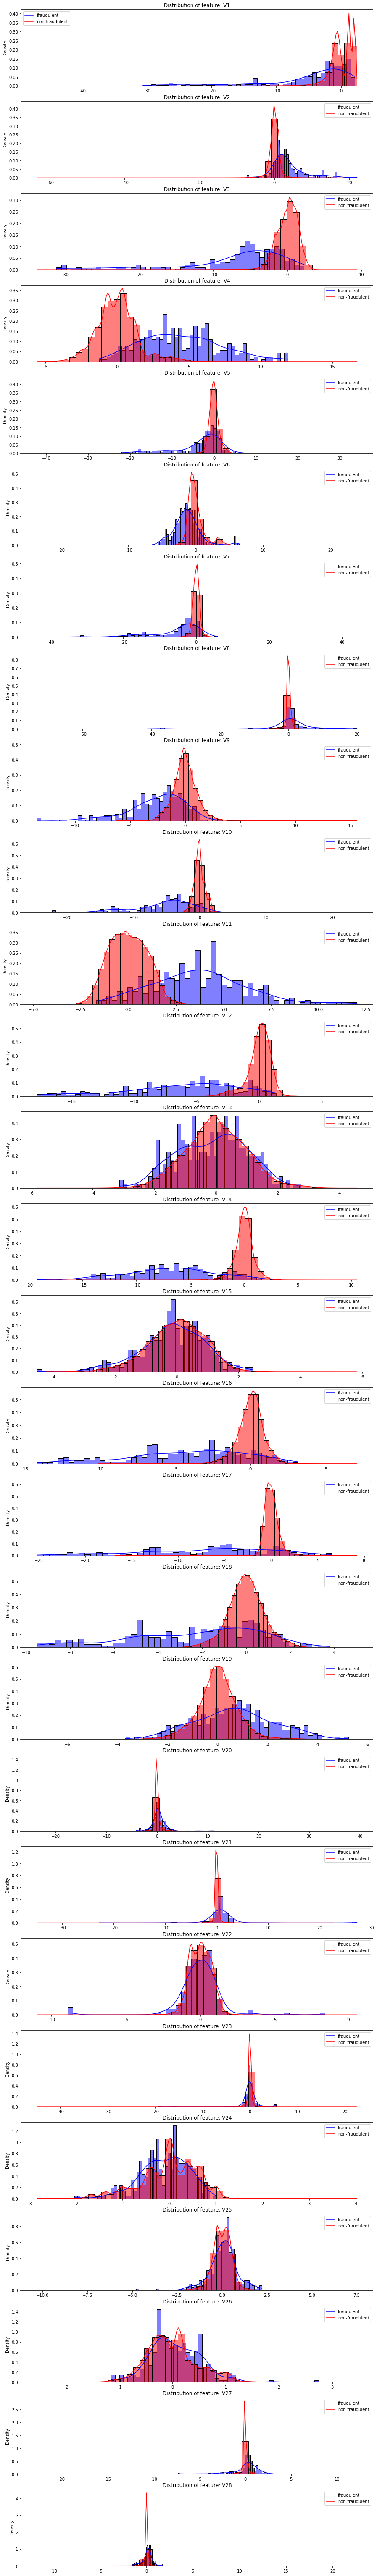

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**Solution:**

**According to the feature distribution graphs, we could notice that there are some features like V13, V15, V22, V24, V25, of which the distributions are basicly the same, thus it would be really hard to tell the difference between non-fraud and fraud classes by analyzing these features. However, there are also numbers of features such as V3, V4, V9, V10, V11, V12, V14, V16, V17, V18, V19, of which distributions are significantly separated away between classes, which means we could focus on these features to distinguish and predict classes.**

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. 
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-fraudulent transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [ ]:
### YOUR CODE HERE ###

## Part a. Fitting regardless of class

from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

import pandas as pd
import numpy as np

gm_frc = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
auc_frc = []

creditFraud_trainvalset = pd.concat([creditFraud_trainset, creditFraud_valset], ignore_index = True)
y_trainval = pd.concat([y_val, y_train], ignore_index = True)

for counter1 in range(28):
  # fit on trainset
  feature_train = creditFraud_trainset.iloc[ : , counter1].values.reshape(-1, 1)
  gm_frc.fit(feature_train)

  # compute auc on train & validation set
  feature_trainval = creditFraud_trainvalset.iloc[ : , counter1].values.reshape(-1, 1)
  gm_frc_ss = gm_frc.score_samples(feature_trainval)
  gm_frc_fpr, gm_frc_tpr, gm_frc_thresholds = roc_curve(y_trainval, 1 - gm_frc_ss)
  auc_fprtpr = auc(gm_frc_fpr, gm_frc_tpr)
  auc_frc.append(auc_fprtpr)

feature_name_list = list(feature_name)

# AUC table
auc_data_frc = {'feature': feature_name_list, 'AUC (frc)': auc_frc}
auc_table_frc = pd.DataFrame(data = auc_data_frc)
auc_table_frc


,feature,AUC (frc)
0,V1,0.483396
1,V2,0.519936
2,V3,0.491913
3,V4,0.508125
4,V5,0.479599
5,V6,0.479352
6,V7,0.499829
7,V8,0.485383
8,V9,0.499510
9,V10,0.499608


In [ ]:
# Find the best 3 features

auc_frc_top3_index = np.argpartition(auc_frc,-3)[-3:]
auc_frc_top3_table = auc_table_frc.loc[auc_frc_top3_index]

print('The top 3 features:')
auc_frc_top3_table


The top 3 features:


,feature,AUC (frc)
9,V10,0.912319
16,V17,0.926213
13,V14,0.950116


Optimal Threshold of V10:

Rough Threshold:  -6.455448428282418     F1 score:  0.14257425742574256
Precise Threshold:  -7.166361431187218  Max F1 score:  0.14592274678111586


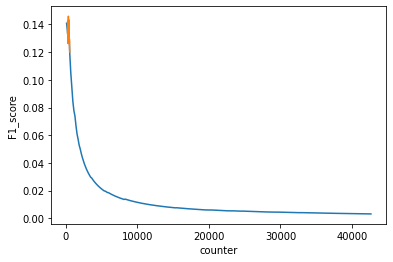

In [ ]:
# Make a prediction based on a model's scores

from sklearn.metrics import f1_score
import seaborn as sns

# V10
print('Optimal Threshold of V10:\n')

# Find a rough best threshold without traversing every threshold
V10_train = creditFraud_trainset.iloc[:, 9].values.reshape(-1,1)
V10_val = creditFraud_valset.iloc[:, 9].values.reshape(-1,1)

gm_frc.fit(V10_train)
gm_frc_ss = gm_frc.score_samples(V10_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V10_val), step_len_rough):
  gm_frc_ss_sorted = sorted(gm_frc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_frc_ss[counter3] < gm_frc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V10_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_frc_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_frc_ss_sorted = sorted(gm_frc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_frc_ss[counter3] < gm_frc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_frc_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Record data

V10_thld_frc = sorted(gm_frc_ss)[precise_counter]
V10_f1_frc = F1_score_precise_max

Optimal Threshold of V17:

Rough Threshold:  -8.396683403481648     F1 score:  0.39436619718309857
Precise Threshold:  -18.375577082482074  Max F1 score:  0.6271186440677965


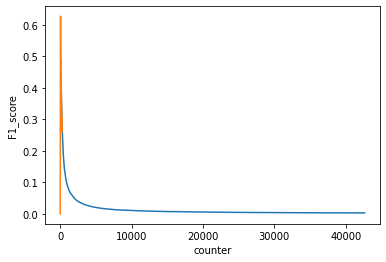

In [ ]:
# V17
print('Optimal Threshold of V17:\n')

# Find a rough best threshold without traversing every threshold
V17_train = creditFraud_trainset.iloc[:, 16].values.reshape(-1,1)
V17_val = creditFraud_valset.iloc[:, 16].values.reshape(-1,1)

gm_frc.fit(V17_train)
gm_frc_ss = gm_frc.score_samples(V17_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V17_val), step_len_rough):
  gm_frc_ss_sorted = sorted(gm_frc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_frc_ss[counter3] < gm_frc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V17_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_frc_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_frc_ss_sorted = sorted(gm_frc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_frc_ss[counter3] < gm_frc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_frc_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Record data

V17_thld_frc = sorted(gm_frc_ss)[precise_counter]
V17_f1_frc = F1_score_precise_max

Optimal Threshold of V14:

Rough Threshold:  -10.410944223358998     F1 score:  0.4507042253521127
Precise Threshold:  -19.630983874816  Max F1 score:  0.5901639344262295


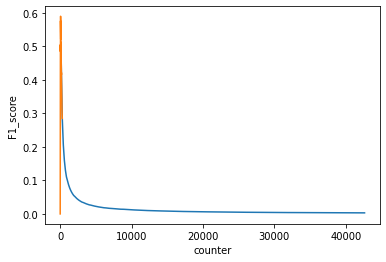

In [ ]:
# V14
print('Optimal Threshold of V14:\n')

# Find a rough best threshold without traversing every threshold
V14_train = creditFraud_valset.iloc[:, 13].values.reshape(-1,1)
V14_val = creditFraud_valset.iloc[:, 13].values.reshape(-1,1)

gm_frc.fit(V14_train)
gm_frc_ss = gm_frc.score_samples(V14_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V14_val), step_len_rough):
  gm_frc_ss_sorted = sorted(gm_frc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_frc_ss[counter3] < gm_frc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V14_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_frc_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_frc_ss_sorted = sorted(gm_frc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_frc_ss[counter3] < gm_frc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_frc_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Record data

V14_thld_frc = sorted(gm_frc_ss)[precise_counter]
V14_f1_frc = F1_score_precise_max

**Here we sample search different threshold in step of 146 (since length of validation set is 42721) at first to find the general trend of F1 score curve, then search the threshold in the area around the rough optimal threshold. Therefore, sample searching takes only 1.3% of the workload of checking every possible threshold.**

**The time complexity of sample searching for determining the optimal threshold:**

**O(n)**



In [ ]:
## Part b. Fitting based on class

# Create a dataset that only contains non-faudulent class

gm_fbc = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
auc_fbc = []

# Remove faudulent data from trainset
creditFraud_nonfaud_trainset = creditFraud_trainset.copy()
y_nonfaud_train = y_train

creditFraud_nonfaud_trainset['Class'] = y_nonfaud_train
creditFraud_nonfaud_trainset = creditFraud_nonfaud_trainset[creditFraud_nonfaud_trainset.iloc[:, -1] == 0]
y_nonfaud_train = creditFraud_nonfaud_trainset['Class']
creditFraud_nonfaud_trainset = creditFraud_nonfaud_trainset.drop(['Class'], axis = 1)

# Remove faudulent data from valset
# creditFraud_nonfaud_valset = creditFraud_valset
# y_nonfaud_val = y_val

# creditFraud_nonfaud_valset['Class'] = y_nonfaud_val
# creditFraud_nonfaud_valset = creditFraud_nonfaud_valset[creditFraud_nonfaud_valset.iloc[:, -1] == 0]
# y_nonfaud_val = creditFraud_nonfaud_valset['Class']
# creditFraud_nonfaud_valset = creditFraud_nonfaud_valset.drop(['Class'], axis = 1)

# Create non-faud train-val set
# creditFraud_nonfaud_trainval = pd.concat([creditFraud_nonfaud_trainset, creditFraud_nonfaud_valset], ignore_index = True)
# y_nonfaud_trainval = pd.concat([y_nonfaud_train, y_nonfaud_val], ignore_index = True)

for counter1 in range(28):
  # fit on trainset
  feature_nonfaud_train = creditFraud_nonfaud_trainset.iloc[ : , counter1].values.reshape(-1, 1)
  gm_fbc.fit(feature_nonfaud_train)

  # compute auc on train & validation set
  feature_trainval = creditFraud_trainvalset.iloc[ : , counter1].values.reshape(-1, 1)
  gm_fbc_ss = gm_fbc.score_samples(feature_trainval)
  gm_fbc_fpr, gm_fbc_tpr, gm_fbc_thresholds = roc_curve(y_trainval, 1 - gm_fbc_ss)
  auc_fprtpr = auc(gm_fbc_fpr, gm_fbc_tpr)
  auc_fbc.append(auc_fprtpr)


# AUC table
auc_data_fbc = {'feature': feature_name_list, 'AUC (fbc)': auc_fbc}
auc_table_fbc = pd.DataFrame(data = auc_data_fbc)

auc_fbc_top3_index = auc_frc_top3_index
auc_fbc_top3_table = auc_table_fbc.loc[auc_fbc_top3_index]

auc_fbc_top3_table


,feature,AUC (fbc)
9,V10,0.912282
16,V17,0.925665
13,V14,0.950230


Optimal Threshold of V10:

Rough Threshold:  -6.8519317667865     F1 score:  0.14257425742574256
Precise Threshold:  -7.692639279464057  Max F1 score:  0.1471861471861472


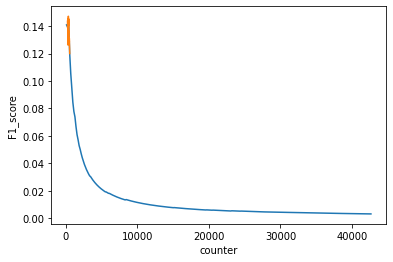

In [ ]:
# V10
print('Optimal Threshold of V10:\n')

# Find a rough best threshold without traversing every threshold
V10_train = creditFraud_nonfaud_trainset.iloc[:, 9].values.reshape(-1,1)
V10_val = creditFraud_valset.iloc[:, 9].values.reshape(-1,1)

gm_fbc.fit(V10_train)
gm_fbc_ss = gm_fbc.score_samples(V10_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V10_val), step_len_rough):
  gm_fbc_ss_sorted = sorted(gm_fbc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_fbc_ss[counter3] < gm_fbc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V10_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_fbc_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_fbc_ss_sorted = sorted(gm_fbc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_fbc_ss[counter3] < gm_fbc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_fbc_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Record data

V10_thld_fbc = sorted(gm_fbc_ss)[precise_counter]
V10_f1_fbc = F1_score_precise_max

Optimal Threshold of V17:

Rough Threshold:  -10.40057264640674     F1 score:  0.39436619718309857
Precise Threshold:  -23.21684761966786  Max F1 score:  0.6271186440677965


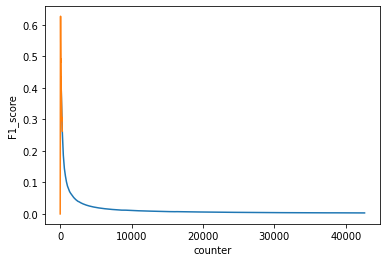

In [ ]:
# V17
print('Optimal Threshold of V17:\n')

# Find a rough best threshold without traversing every threshold
V17_train = creditFraud_nonfaud_trainset.iloc[:, 16].values.reshape(-1,1)
V17_val = creditFraud_valset.iloc[:, 16].values.reshape(-1,1)

gm_fbc.fit(V17_train)
gm_fbc_ss = gm_fbc.score_samples(V17_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V17_val), step_len_rough):
  gm_fbc_ss_sorted = sorted(gm_fbc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_fbc_ss[counter3] < gm_fbc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V17_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_fbc_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_fbc_ss_sorted = sorted(gm_fbc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_fbc_ss[counter3] < gm_fbc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_fbc_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Record data

V17_thld_fbc = sorted(gm_fbc_ss)[precise_counter]
V17_f1_fbc = F1_score_precise_max

Optimal Threshold of V14:

Rough Threshold:  -11.454377431997013     F1 score:  0.4507042253521127
Precise Threshold:  -21.834397838511798  Max F1 score:  0.5901639344262295


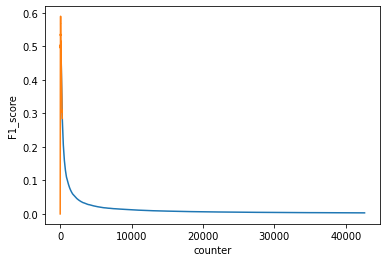

In [ ]:
# V14
print('Optimal Threshold of V14:\n')

# Find a rough best threshold without traversing every threshold
V14_train = creditFraud_nonfaud_trainset.iloc[:, 13].values.reshape(-1,1)
V14_val = creditFraud_valset.iloc[:, 13].values.reshape(-1,1)

gm_fbc.fit(V14_train)
gm_fbc_ss = gm_fbc.score_samples(V14_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V14_val), step_len_rough):
  gm_fbc_ss_sorted = sorted(gm_fbc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_fbc_ss[counter3] < gm_fbc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V14_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_fbc_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_fbc_ss_sorted = sorted(gm_fbc_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_fbc_ss[counter3] < gm_fbc_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_fbc_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Record data

V14_thld_fbc = sorted(gm_fbc_ss)[precise_counter]
V14_f1_fbc = F1_score_precise_max

In [ ]:
# Put all the data together into one table for comparison

auc_fbc_top3_table_ = auc_fbc_top3_table.drop(['feature'], axis = 1)

auc_table_frc_fbc = pd.concat([auc_frc_top3_table, auc_fbc_top3_table_], axis = 1)

thld_frc = [V10_thld_frc,V17_thld_frc,V14_thld_frc]
thld_fbc = [V10_thld_fbc,V17_thld_fbc,V14_thld_fbc]
F1_frc = [V10_f1_frc,V17_f1_frc,V14_f1_frc]
F1_fbc = [V10_f1_fbc,V17_f1_fbc,V14_f1_fbc]

f1_frc_fbc_data = {'Threshold (frc)':thld_frc,'Threshold (fbc)':thld_fbc,'F1 Score (frc)':F1_frc,'F1 Score (fbc)':F1_fbc}
f1_frc_fbc_table = pd.DataFrame(data = f1_frc_fbc_data, index = [9,13,16])

table_frc_fbc = pd.concat([auc_table_frc_fbc, f1_frc_fbc_table], axis = 1)
table_frc_fbc


,feature,AUC (frc),AUC (fbc),Threshold (frc),Threshold (fbc),F1 Score (frc),F1 Score (fbc)
9,V10,0.912319,0.912282,-7.166361,-7.692639,0.145923,0.147186
13,V14,0.950116,0.950230,-18.375577,-23.216848,0.627119,0.627119
16,V17,0.926213,0.925665,-19.630984,-21.834398,0.590164,0.590164


**There is no significant difference between these two models. The AUC and F1 score of the full-train class-regardless model (frc) are very close to those of the non-fraud class-based model (fbc).**

**The main cause for this phenomenon is supposed to be the unbalance of the credit card fraud dataset, since there are far more non-fraudulent data (99.827%) than fradulent data (0.173%), which leads to the dominance of non-fraudulent data during model fitting.**

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). 
 3. Color the data points based on their class (non-fraudulent blue and fraudulent red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points. 
 6. Compute AUC on both training and validation sets 
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





**The 4 pairs of features picked up are V9-V10, V11-V12, V16-V17, V18-V19.**

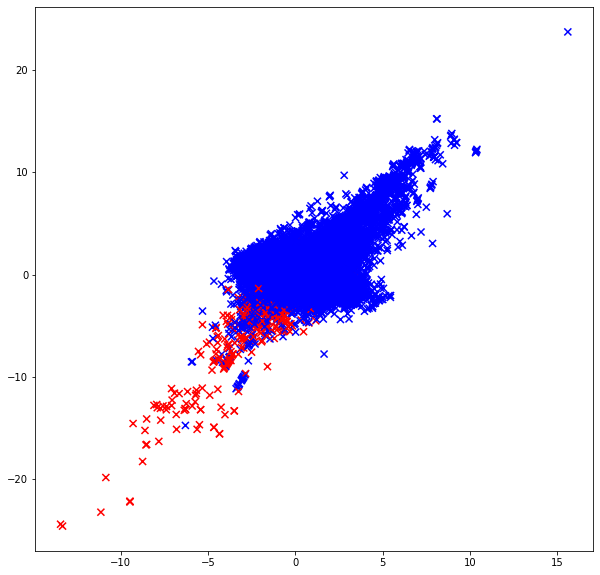

In [ ]:
### YOUR CODE HERE ###

## V9 & V10

V9_train = creditFraud_trainset['V9']
V10_train = creditFraud_trainset['V10']

V9_val = creditFraud_valset['V9']
V10_val = creditFraud_valset['V10']

V9V10_train = pd.concat([V9_train, V10_train], axis = 1, ignore_index = True)
V9V10_val = pd.concat([V9_val, V10_val], axis = 1, ignore_index = True)
V9V10_trainval = pd.concat([V9V10_train, V9V10_val], axis = 0, ignore_index = True)

color_label = {0:'blue', 1:'red'}

plt.figure(figsize=(10,10))
plt.scatter(V9_train, V10_train, marker='x', c = y_train.map(color_label), s = 50)
plt.show()

**We could see there is a  cluster of the non-fradulent class (blue area), with fraudulent datapoint distributed in the lower left side. Various Gaussian components have been tested and 2 is proved to be the best option since it achieve the highest AUC and F1 score.**

In [ ]:
gm_V9V10 = GaussianMixture(n_components = 2, covariance_type = 'full', random_state = 0)
auc_V9V10 = []


for counter1 in range(2):
  # fit on trainset
  feature_V9V10_train = V9V10_train.iloc[ : , counter1].values.reshape(-1, 1)
  gm_V9V10.fit(feature_V9V10_train)

  # compute auc on train & validation set
  feature_V9V10_trainval = V9V10_trainval.iloc[ : , counter1].values.reshape(-1, 1)
  gm_V9V10_ss = gm_V9V10.score_samples(feature_trainval)
  gm_V9V10_fpr, gm_V9V10_tpr, gm_V9V10_thresholds = roc_curve(y_trainval, 1 - gm_V9V10_ss)
  auc_V9V10_fprtpr = auc(gm_V9V10_fpr, gm_V9V10_tpr)
  auc_V9V10.append(auc_V9V10_fprtpr)

# AUC

auc_data_V9V10 = {'feature': ['V9','V10'], 'AUC (V9 V10)': auc_V9V10}
auc_table_V9V10 = pd.DataFrame(data = auc_data_V9V10)
auc_table_V9V10

,feature,AUC (V9 V10)
0,V9,0.794097
1,V10,0.814370


Rough Threshold:  -9.226237055024868     F1 score:  0.1784037558685446
Precise Threshold:  -12.434546673250413  Max F1 score:  0.26373626373626374


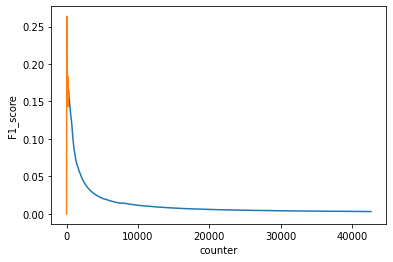

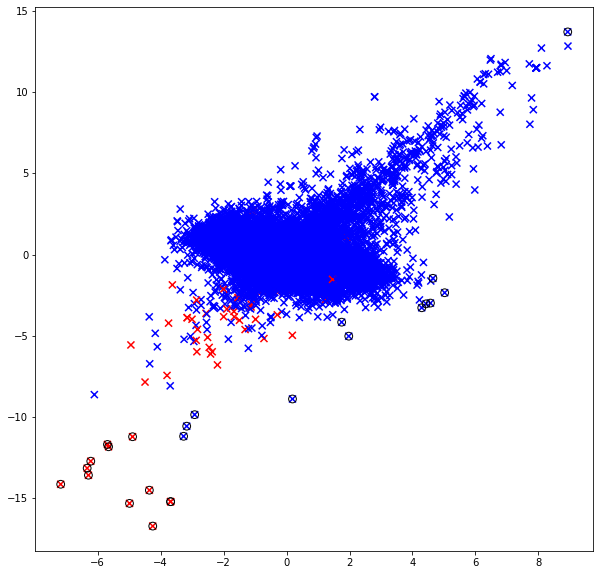

In [ ]:
# F1

# Find a rough best threshold without traversing every threshold

gm_V9V10.fit(V9V10_train)
gm_V9V10_ss = gm_V9V10.score_samples(V9V10_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V9V10_val), step_len_rough):
  gm_V9V10_ss_sorted = sorted(gm_V9V10_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_V9V10_ss[counter3] < gm_V9V10_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V9V10_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_V9V10_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_V9V10_ss_sorted = sorted(gm_V9V10_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_V9V10_ss[counter3] < gm_V9V10_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_V9V10_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Plot outliers with circles

plt.figure(figsize=(10,10))
plt.scatter(V9_val, V10_val, marker='x', c = y_val.map(color_label), s = 50)
outliers = np.nonzero(gm_V9V10_ss < sorted(gm_V9V10_ss)[precise_counter])[0]
plt.scatter(V9V10_val.values[outliers,0], V9V10_val.values[outliers,1], marker = 'o', facecolor = 'none', edgecolor = 'black', s = 60)
plt.show()

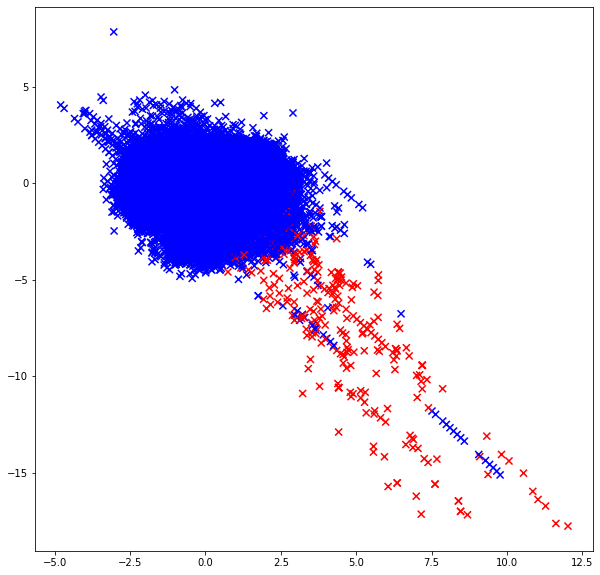

In [ ]:
## V11 & V12

V11_train = creditFraud_trainset['V11']
V12_train = creditFraud_trainset['V12']

V11_val = creditFraud_valset['V11']
V12_val = creditFraud_valset['V12']

V11V12_train = pd.concat([V11_train, V12_train], axis = 1, ignore_index = True)
V11V12_val = pd.concat([V11_val, V12_val], axis = 1, ignore_index = True)
V11V12_trainval = pd.concat([V11V12_train, V11V12_val], axis = 0, ignore_index = True)

color_label = {0:'blue', 1:'red'}

plt.figure(figsize=(10,10))
plt.scatter(V11_train, V12_train, marker='x', c = y_train.map(color_label), s = 50)
plt.show()

**We could see there is 1 round cluster of the non-fradulent class (blue area), with fraudulent datapoint distributed in the lower right side. Therefore, we set Gaussian component as 1.**

In [ ]:
gm_V11V12 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
auc_V11V12 = []


for counter1 in range(2):
  # fit on trainset
  feature_V11V12_train = V11V12_train.iloc[ : , counter1].values.reshape(-1, 1)
  gm_V11V12.fit(feature_V11V12_train)

  # compute auc on train & validation set
  feature_V11V12_trainval = V11V12_trainval.iloc[ : , counter1].values.reshape(-1, 1)
  gm_V11V12_ss = gm_V11V12.score_samples(feature_trainval)
  gm_V11V12_fpr, gm_V11V12_tpr, gm_V11V12_thresholds = roc_curve(y_trainval, 1 - gm_V11V12_ss)
  auc_V11V12_fprtpr = auc(gm_V11V12_fpr, gm_V11V12_tpr)
  auc_V11V12.append(auc_V11V12_fprtpr)

# AUC

auc_data_V11V12 = {'feature': ['V11','V12'], 'AUC (V11 V12)': auc_V11V12}
auc_table_V11V12 = pd.DataFrame(data = auc_data_V11V12)
auc_table_V11V12

,feature,AUC (V11 V12)
0,V11,0.811338
1,V12,0.811526


Rough Threshold:  -9.301582679752702     F1 score:  0.40375586854460094
Precise Threshold:  -14.593300013389449  Max F1 score:  0.6440677966101696


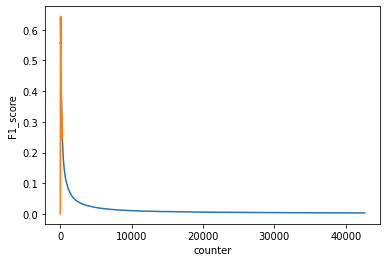

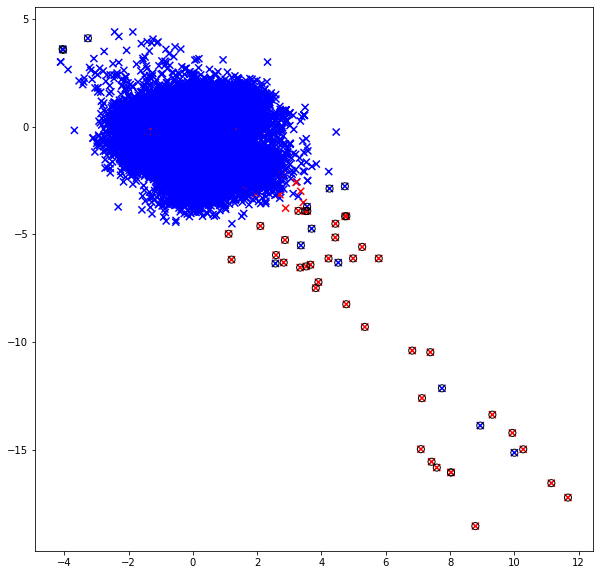

In [ ]:
# F1

# Find a rough best threshold without traversing every threshold

gm_V11V12.fit(V11V12_train)
gm_V11V12_ss = gm_V11V12.score_samples(V11V12_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V11V12_val), step_len_rough):
  gm_V11V12_ss_sorted = sorted(gm_V11V12_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_V11V12_ss[counter3] < gm_V11V12_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V11V12_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_V11V12_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_V11V12_ss_sorted = sorted(gm_V11V12_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_V11V12_ss[counter3] < gm_V11V12_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_V11V12_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Plot outliers with circles

plt.figure(figsize=(10,10))
plt.scatter(V11_val, V12_val, marker='x', c = y_val.map(color_label), s = 50)
outliers = np.nonzero(gm_V11V12_ss < sorted(gm_V11V12_ss)[precise_counter])[0]
plt.scatter(V11V12_val.values[outliers,0], V11V12_val.values[outliers,1], marker = 'o', facecolor = 'none', edgecolor = 'black', s = 50)
plt.show()

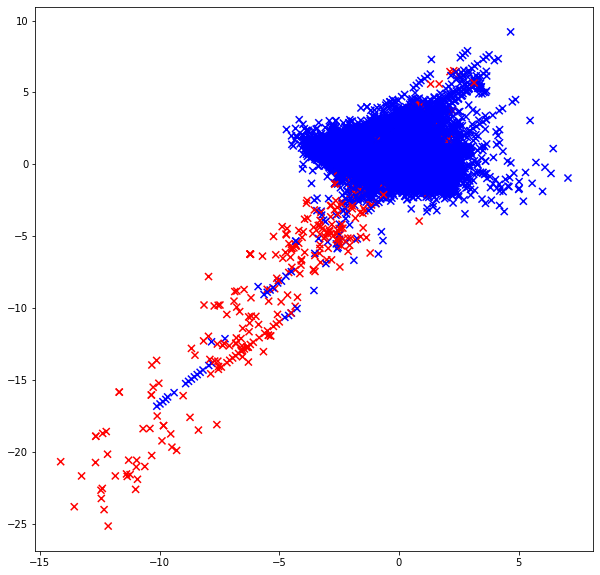

In [ ]:
## V16 & V17

V16_train = creditFraud_trainset['V16']
V17_train = creditFraud_trainset['V17']

V16_val = creditFraud_valset['V16']
V17_val = creditFraud_valset['V17']

V16V17_train = pd.concat([V16_train, V17_train], axis = 1, ignore_index = True)
V16V17_val = pd.concat([V16_val, V17_val], axis = 1, ignore_index = True)
V16V17_trainval = pd.concat([V16V17_train, V16V17_val], axis = 0, ignore_index = True)

color_label = {0:'blue', 1:'red'}

plt.figure(figsize=(10,10))
plt.scatter(V16_train, V17_train, marker='x', c = y_train.map(color_label), s = 50)
plt.show()

**We could see there is a cluster of the non-fradulent class (blue area), with fraudulent datapoint distributed in the lower left side. We set Gaussian component as 1 since it is tested to achieve the highest AUC and F1 score.**

In [ ]:
gm_V16V17 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
auc_V16V17 = []


for counter1 in range(2):
  # fit on trainset
  feature_V16V17_train = V16V17_train.iloc[ : , counter1].values.reshape(-1, 1)
  gm_V16V17.fit(feature_V16V17_train)

  # compute auc on train & validation set
  feature_V16V17_trainval = V16V17_trainval.iloc[ : , counter1].values.reshape(-1, 1)
  gm_V16V17_ss = gm_V16V17.score_samples(feature_trainval)
  gm_V16V17_fpr, gm_V16V17_tpr, gm_V16V17_thresholds = roc_curve(y_trainval, 1 - gm_V16V17_ss)
  auc_V16V17_fprtpr = auc(gm_V16V17_fpr, gm_V16V17_tpr)
  auc_V16V17.append(auc_V16V17_fprtpr)

# AUC

auc_data_V16V17 = {'feature': ['V16','V17'], 'AUC (V16 V17)': auc_V16V17}
auc_table_V16V17 = pd.DataFrame(data = auc_data_V16V17)
auc_table_V16V17

,feature,AUC (V16 V17)
0,V16,0.810923
1,V17,0.810841


Rough Threshold:  -10.904992705724323     F1 score:  0.4225352112676057
Precise Threshold:  -23.904209974582727  Max F1 score:  0.6260869565217392


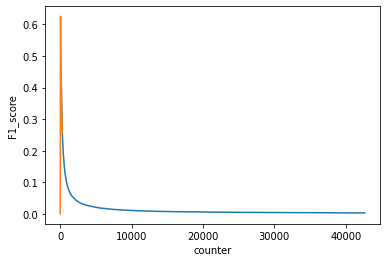

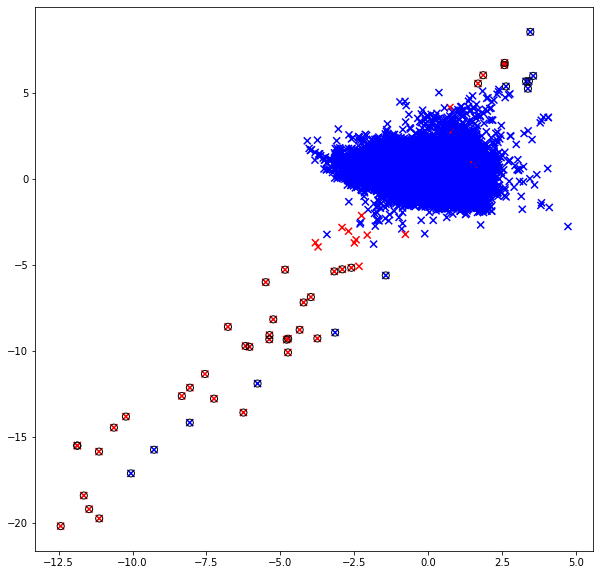

In [ ]:
# F1

# Find a rough best threshold without traversing every threshold

gm_V16V17.fit(V16V17_train)
gm_V16V17_ss = gm_V16V17.score_samples(V16V17_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V16V17_val), step_len_rough):
  gm_V16V17_ss_sorted = sorted(gm_V16V17_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_V16V17_ss[counter3] < gm_V16V17_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V16V17_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_V16V17_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_V16V17_ss_sorted = sorted(gm_V16V17_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_V16V17_ss[counter3] < gm_V16V17_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_V16V17_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Plot outliers with circles

plt.figure(figsize=(10,10))
plt.scatter(V16_val, V17_val, marker='x', c = y_val.map(color_label), s = 50)
outliers = np.nonzero(gm_V16V17_ss < sorted(gm_V16V17_ss)[precise_counter])[0]
plt.scatter(V16V17_val.values[outliers,0], V16V17_val.values[outliers,1], marker = 'o', facecolor = 'none', edgecolor = 'black', s = 50)
plt.show()

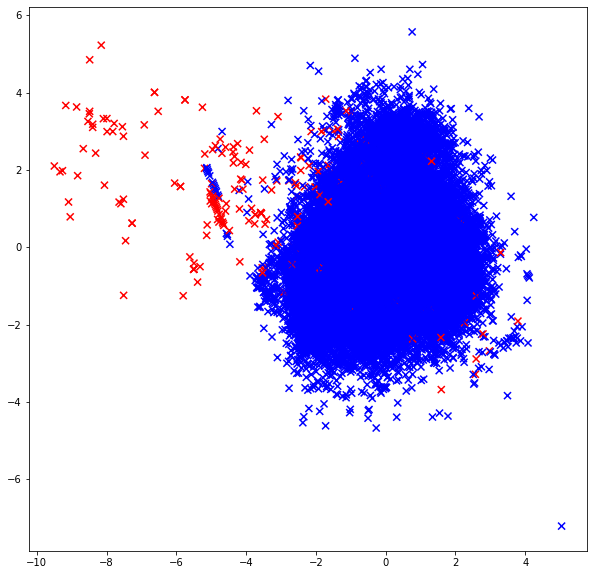

In [ ]:
## V18 & V19

V18_train = creditFraud_trainset['V18']
V19_train = creditFraud_trainset['V19']

V18_val = creditFraud_valset['V18']
V19_val = creditFraud_valset['V19']

V18V19_train = pd.concat([V18_train, V19_train], axis = 1, ignore_index = True)
V18V19_val = pd.concat([V18_val, V19_val], axis = 1, ignore_index = True)
V18V19_trainval = pd.concat([V18V19_train, V18V19_val], axis = 0, ignore_index = True)

color_label = {0:'blue', 1:'red'}

plt.figure(figsize=(10,10))
plt.scatter(V18_train, V19_train, marker='x', c = y_train.map(color_label), s = 50)
plt.show()

**We could see there is a  cluster of the non-fradulent class (blue area), with fraudulent datapoint distributed in the left side. We tried various Gaussian component and 3 is shown to be the best.**

In [ ]:
gm_V18V19 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state = 0)
auc_V18V19 = []


for counter1 in range(2):
  # fit on trainset
  feature_V18V19_train = V18V19_train.iloc[ : , counter1].values.reshape(-1, 1)
  gm_V18V19.fit(feature_V18V19_train)

  # compute auc on train & validation set
  feature_V18V19_trainval = V18V19_trainval.iloc[ : , counter1].values.reshape(-1, 1)
  gm_V18V19_ss = gm_V18V19.score_samples(feature_trainval)
  gm_V18V19_fpr, gm_V18V19_tpr, gm_V18V19_thresholds = roc_curve(y_trainval, 1 - gm_V18V19_ss)
  auc_V18V19_fprtpr = auc(gm_V18V19_fpr, gm_V18V19_tpr)
  auc_V18V19.append(auc_V18V19_fprtpr)

# AUC

auc_data_V18V19 = {'feature': ['V18','V19'], 'AUC (V18 V19)': auc_V18V19}
auc_table_V18V19 = pd.DataFrame(data = auc_data_V18V19)
auc_table_V18V19

,feature,AUC (V18 V19)
0,V18,0.816426
1,V19,0.804213


Rough Threshold:  -7.573628952814342     F1 score:  0.2347417840375587
Precise Threshold:  -9.126507326875776  Max F1 score:  0.375


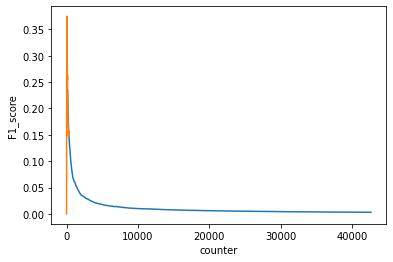

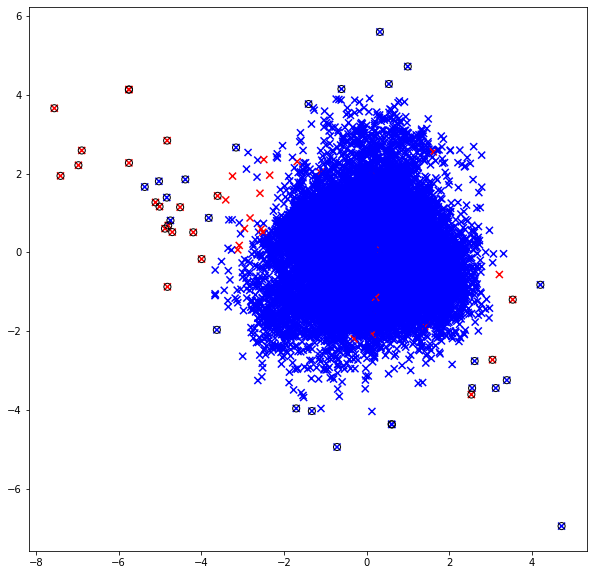

In [ ]:
# F1

# Find a rough best threshold without traversing every threshold

gm_V18V19.fit(V18V19_train)
gm_V18V19_ss = gm_V18V19.score_samples(V18V19_val)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(V18V19_val), step_len_rough):
  gm_V18V19_ss_sorted = sorted(gm_V18V19_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_V18V19_ss[counter3] < gm_V18V19_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(V18V19_val), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]
print('Rough Threshold: ',sorted(gm_V18V19_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
F1_plot1_rough = pd.DataFrame(F1_data_rough)
sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_V18V19_ss_sorted = sorted(gm_V18V19_ss)[counter2]
  y_val_pre = []

  for counter3 in range(len(y_val)):
    if gm_V18V19_ss[counter3] < gm_V18V19_ss_sorted:
      y_val_pre.append(1)
    else:
      y_val_pre.append(0)
    
  F1 = f1_score(y_val, y_val_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]
precise_counter = precise_list[F1_score_precise_index]
print('Precise Threshold: ',sorted(gm_V18V19_ss)[precise_counter],' Max F1 score: ', F1_score_precise_max)

F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
F1_plot1_precise = pd.DataFrame(F1_data_precise)
sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

# Plot outliers with circles

plt.figure(figsize=(10,10))
plt.scatter(V18_val, V19_val, marker='x', c = y_val.map(color_label), s = 50)
outliers = np.nonzero(gm_V18V19_ss < sorted(gm_V18V19_ss)[precise_counter])[0]
plt.scatter(V18V19_val.values[outliers,0], V18V19_val.values[outliers,1], marker = 'o', facecolor = 'none', edgecolor = 'black', s = 50)
plt.show()

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [ ]:
### YOUR CODE HERE ###

# Non-fraudulent transactions set
creditFraud_nonfaud_trainset = creditFraud_trainset[creditFraud_trainset.iloc[:,-1] == 0]
creditFraud_nonfaud_trainset = creditFraud_nonfaud_trainset.drop(['Class'], axis = 1)

# Fraudulent transactions set
creditFraud_faud_trainset = creditFraud_trainset[creditFraud_trainset.iloc[:,-1] == 1]
creditFraud_faud_trainset = creditFraud_faud_trainset.drop(['Class'], axis = 1)

## V14 is shown to be the best perfomance feature in Part2, so we pick V14 first
## Fit G1 on V14 of non-fraudulent transactions

V14_nonfaud_train = creditFraud_nonfaud_trainset.iloc[:, 13].values.reshape(-1,1)
V14_faud_train = creditFraud_faud_trainset.iloc[:, 13].values.reshape(-1,1)

V14_train = creditFraud_trainset.iloc[:, 13].values.reshape(-1,1)
V14_val = creditFraud_valset.iloc[:, 13].values.reshape(-1,1)

# Fit G1
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(V14_nonfaud_train)
S1 = G1.score_samples(V14_val)

# Fit G2
G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G2.fit(V14_faud_train)
S2 = G2.score_samples(V14_val)

# Find an optimal c that maximizes F1

F1_score_V14 = []

for c in np.arange(0, 10, 0.1):
  F1 = f1_score(y_val, S1 < c*S2)
  F1_score_V14.append(F1)

print('V14\nOptimal c :', round(0.1*np.argmax(F1_score_V14), 1), '\nMaximum F1 Score:', np.max(F1_score_V14))

V14
Optimal c : 9.3 
Maximum F1 Score: 0.6371681415929203


In [ ]:
## Repeat the steps above for all the features

best_F1 = 0

# Here we use a loop to repeat searching
for counter in range(28):

  V_nonfaud_train = creditFraud_nonfaud_trainset.iloc[:, counter].values.reshape(-1,1)
  V_faud_train = creditFraud_faud_trainset.iloc[:, counter].values.reshape(-1,1)

  V_train = creditFraud_trainset.iloc[:, counter].values.reshape(-1,1)
  V_val = creditFraud_valset.iloc[:, counter].values.reshape(-1,1)

  # Fit G1
  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(V_nonfaud_train)
  S1 = G1.score_samples(V_val)

  # Fit G2
  G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G2.fit(V_faud_train)
  S2 = G2.score_samples(V_val)

  # Find an optimal c that maximizes F1
  F1_score_V = []

  for c in np.arange(0, 10, 0.1):
    F1 = f1_score(y_val, S1 < c*S2)
    F1_score_V.append(F1)

  current_V = counter+1
  current_c = round(0.1*np.argmax(F1_score_V), 1)
  current_F1 = np.max(F1_score_V)

  print('V',current_V, '\nOptimal c :', current_c, '\nMaximum F1 Score:', current_F1, '\n\n')

  # Record the best F1 with its c and feature
  if current_F1 > best_F1:
    best_V = current_V
    best_c = current_c
    best_F1 = current_F1

# Print best F1
print('-------------------------------------------------------------\n')
print('The final best result:\nV',best_V, '\nOptimal c :', best_c, '\nMaximum F1 Score:', best_F1)






V 1 
Optimal c : 5.0 
Maximum F1 Score: 0.0970873786407767 


V 2 
Optimal c : 3.7 
Maximum F1 Score: 0.1111111111111111 


V 3 
Optimal c : 9.9 
Maximum F1 Score: 0.2736842105263158 


V 4 
Optimal c : 4.5 
Maximum F1 Score: 0.36363636363636365 


V 5 
Optimal c : 5.0 
Maximum F1 Score: 0.14606741573033707 


V 6 
Optimal c : 1.9 
Maximum F1 Score: 0.10687022900763357 


V 7 
Optimal c : 7.8 
Maximum F1 Score: 0.20779220779220778 


V 8 
Optimal c : 4.9 
Maximum F1 Score: 0.03870967741935484 


V 9 
Optimal c : 3.3 
Maximum F1 Score: 0.3655913978494624 


V 10 
Optimal c : 8.6 
Maximum F1 Score: 0.34090909090909094 


V 11 
Optimal c : 3.8 
Maximum F1 Score: 0.5172413793103449 


V 12 
Optimal c : 4.8 
Maximum F1 Score: 0.611111111111111 


V 13 
Optimal c : 1.1 
Maximum F1 Score: 0.005935976256094975 


V 14 
Optimal c : 9.3 
Maximum F1 Score: 0.6371681415929203 


V 15 
Optimal c : 1.2 
Maximum F1 Score: 0.0060790273556231 


V 16 
Optimal c : 4.6 
Maximum F1 Score: 0.56880733944954

**The final best result:**

**V17** 

**Optimal c : 7.2** 

**Maximum F1 Score: 0.6545454545454547**

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraudulent ones! Why does it make sense to have multiple components for fraudulent transactions?

## Model Catalogue

**Model 1:**  Fit on both classes with all features

**Model 2:**  Fit on both classes with only feature V14

**Model 3:**  Fit on Non-Fraudulent transactions with all features

**Model 4:**  Fit on Non-Fraudulent transactions with only feature V14

**Model 5-8:** Fit on both classes with increasing number of features (V14, V17, V10, V12, V16)

**Model 9-12:** Fit on Non-Fraudulent transactions with increasing number of features (V14, V17, V10, V12, V16)



**Important Notice**

For every model, we actually try different n_components with a loop and design a simple rule to find the best n_components. **Actually every single model from 1 to 12 contains several models with various n_components.** To make things easier rather than showing every n_components we tried which makes the final result table to be a total mess, here we **only show the best n_components in the final result table** with its corresponding model index.



In [ ]:
### YOUR CODE HERE ###

gm_frc = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
auc_frc = []

for counter1 in range(28):
  # fit on trainset
  feature_train = creditFraud_trainset.iloc[ : , counter1].values.reshape(-1, 1)
  gm_frc.fit(feature_train)

  # compute auc on train & validation set
  feature_trainval = creditFraud_trainvalset.iloc[ : , counter1].values.reshape(-1, 1)
  gm_frc_ss = gm_frc.score_samples(feature_trainval)
  gm_frc_fpr, gm_frc_tpr, gm_frc_thresholds = roc_curve(y_trainval, 1 - gm_frc_ss)
  auc_fprtpr = auc(gm_frc_fpr, gm_frc_tpr)
  auc_frc.append(auc_fprtpr)

feature_name_list = list(feature_name)

# AUC table
auc_data_frc = {'feature': feature_name_list, 'AUC (frc)': auc_frc}
auc_table_frc = pd.DataFrame(data = auc_data_frc)
auc_table_frc.sort_values(by = ['AUC (frc)'], ascending = False)


,feature,AUC (frc)
13,V14,0.950116
16,V17,0.926213
9,V10,0.912319
11,V12,0.906809
15,V16,0.898994
10,V11,0.894685
3,V4,0.891462
2,V3,0.870328
6,V7,0.863684
1,V2,0.837542


## Model 1 : Fit on both classes, All features

Model 1: Optimal Threshold of FRC All Features:

----------------------------------------------------------

Current n_components: 1
AUC:  0.930668782966585  Max F1 score:  0.16701461377870566 

Current n_components: 2
AUC:  0.8958061710017923  Max F1 score:  0.20952380952380953 

Current n_components: 3
AUC:  0.898034444460774  Max F1 score:  0.21021021021021022 

Current n_components: 4
AUC:  0.9003379501423814  Max F1 score:  0.2625 

Current n_components: 5
AUC:  0.9032744562459891  Max F1 score:  0.22641509433962265 

Current n_components: 6
AUC:  0.8995579844482748  Max F1 score:  0.2794117647058823 

Current n_components: 7
AUC:  0.8978580861342464  Max F1 score:  0.15261044176706828 

Current n_components: 8
AUC:  0.9025448786451761  Max F1 score:  0.30645161290322576 

Current n_components: 9
AUC:  0.9048564324250179  Max F1 score:  0.3087248322147651 

Current n_components: 10
AUC:  0.8955297363233068  Max F1 score:  0.2627737226277372 

Current n_components: 11
AUC:  0.90025

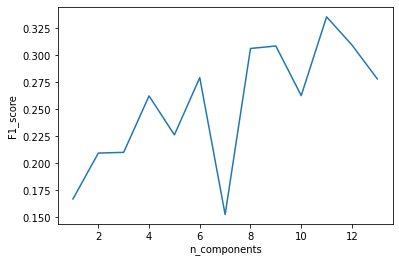

In [ ]:
# Fit Regardless of Classes, All features
print('Model 1: Optimal Threshold of FRC All Features:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0


while(n_components_flag):

  gm_model_1 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_1.fit(creditFraud_trainset)
  gm_ss = gm_model_1.score_samples(creditFraud_valset)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 147

  for counter2 in range(step_len_rough, int(len(creditFraud_valset)), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, int(len(creditFraud_valset)), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_1 = best_n_components
best_AUC_model_1 = best_AUC
best_F1_model_1 = best_F1



# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_1, '  Best AUC:',best_AUC_model_1, ' Best F1 Score:',best_F1_model_1)

## Model 2 : Fit on both classes, Feature V14

Model 2: Optimal Threshold of FRC Feature V14:

----------------------------------------------------------

Current n_components: 1
AUC:  0.9380726834249067  Max F1 score:  0.5901639344262295 

Current n_components: 2
AUC:  0.9370460260240505  Max F1 score:  0.5625 

Current n_components: 3
AUC:  0.9378476865916584  Max F1 score:  0.5166666666666667 

----------------------------------------------------------

Best n_components: 1   Best AUC: 0.9380726834249067  Best F1 Score: 0.5901639344262295


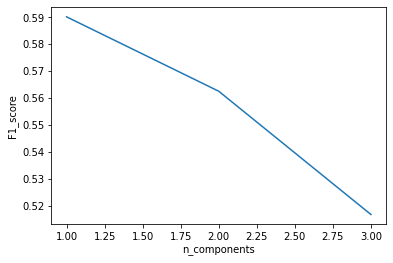

In [ ]:
# Fit Regardless of Classes, Feature V14
print('Model 2: Optimal Threshold of FRC Feature V14:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0


while(n_components_flag):

  gm_model_2 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_2.fit(creditFraud_trainset.iloc[:, 13].values.reshape(-1,1))
  gm_ss = gm_model_2.score_samples(creditFraud_valset.iloc[:, 13].values.reshape(-1,1))
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_2 = best_n_components
best_AUC_model_2 = best_AUC
best_F1_model_2 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_2, '  Best AUC:',best_AUC_model_2, ' Best F1 Score:',best_F1_model_2)

## Model 3 : Fit on Non-Fraudulent transactions, All Features

Model 3: Optimal Threshold of FBC All Features:

----------------------------------------------------------

Current n_components: 1
AUC:  0.935440955302262  Max F1 score:  0.5084745762711865 

Current n_components: 2
AUC:  0.920405358213854  Max F1 score:  0.4958677685950414 

Current n_components: 3
AUC:  0.9087597600686959  Max F1 score:  0.4869565217391304 

----------------------------------------------------------

Best n_components: 1   Best AUC: 0.935440955302262  Best F1 Score: 0.5084745762711865


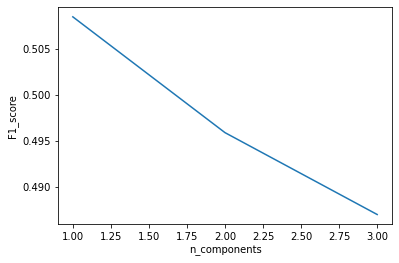

In [ ]:
# Fit based on Non-Fraudulent transactions, All Features
print('Model 3: Optimal Threshold of FBC All Features:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0


while(n_components_flag):

  gm_model_3 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_3.fit(creditFraud_nonfaud_trainset)
  gm_ss = gm_model_3.score_samples(creditFraud_valset)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_3 = best_n_components
best_AUC_model_3 = best_AUC
best_F1_model_3 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_3, '  Best AUC:',best_AUC_model_3, ' Best F1 Score:',best_F1_model_3)

## Model 4 : Fit on Non-Fraudulent transactions, Feature V14



Model 4: Optimal Threshold of FBC Feature V14:

----------------------------------------------------------

Current n_components: 1
AUC:  0.9380723335075922  Max F1 score:  0.5901639344262295 

Current n_components: 2
AUC:  0.9369746428918846  Max F1 score:  0.576 

Current n_components: 3
AUC:  0.9378221426276971  Max F1 score:  0.5210084033613446 

----------------------------------------------------------

Best n_components: 1   Best AUC: 0.9380723335075922  Best F1 Score: 0.5901639344262295


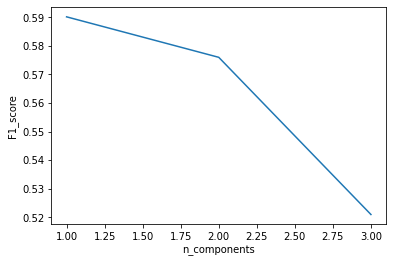

In [ ]:
# Fit based on Non-Fraudulent transactions, Feature V14
print('Model 4: Optimal Threshold of FBC Feature V14:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0


while(n_components_flag):

  gm_model_4 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_4.fit(creditFraud_nonfaud_trainset.iloc[:, 13].values.reshape(-1,1))
  gm_ss = gm_model_4.score_samples(creditFraud_valset.iloc[:, 13].values.reshape(-1,1))
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_4 = best_n_components
best_AUC_model_4 = best_AUC
best_F1_model_4 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_4, '  Best AUC:',best_AUC_model_4, ' Best F1 Score:',best_F1_model_4)

In [ ]:
## Put all the data of Model 1-4 into a table for analysis

model_list = list(['Model 1', 'Model 2', 'Model 3', 'Model 4'])
n_components_list = list([best_n_components_model_1, best_n_components_model_2, best_n_components_model_3, best_n_components_model_4])
AUC_list = list([best_AUC_model_1, best_AUC_model_2, best_AUC_model_3, best_AUC_model_4])
F1_list = list([best_F1_model_1, best_F1_model_2, best_F1_model_3, best_F1_model_4])

model_test_data = {'Model': model_list, 'Best n_components':n_components_list, 'AUC':AUC_list, 'Best F1 Score':F1_list}
model_test_table = pd.DataFrame(data = model_test_data)
model_test_table.sort_values(by = ['Best F1 Score', 'AUC'], ascending = False)

,Model,Best n_components,AUC,Best F1 Score
1,Model 2,1,0.938073,0.590164
3,Model 4,1,0.938072,0.590164
2,Model 3,1,0.935441,0.508475
0,Model 1,11,0.900259,0.335766


## Analysis of Model 1-4

**It could be seen easily that models of single features (Model 2 & 4) significantly perform better that models of full features (Model 1 & 3), while it is hard to indicate which one perform better between fitting on full-train set and fitting on Non-Fraudulent set. Besides, best Gaussian mixture numbers of components seem to vary from model to model.**

**Therefore, we stick to partial features models, and try different numbers of features on models fitting, in order to check if models of more than 1 feature (not full-features) could achieve better performance than that of single feature, as well as whether there is visible performance difference  between models of non-fraudulent and full-training fitting.**

## Model 5 : Fit on both classes, Feature V14, V17

Model 5: Optimal Threshold of FRC Feature V14, V17:

----------------------------------------------------------

Current n_components: 1
AUC:  0.942924286990984  Max F1 score:  0.7111111111111111 

Current n_components: 2
AUC:  0.9419840591668188  Max F1 score:  0.6870229007633589 

Current n_components: 3
AUC:  0.9409860949857548  Max F1 score:  0.5740740740740741 

----------------------------------------------------------

Best n_components: 1   Best AUC: 0.942924286990984  Best F1 Score: 0.7111111111111111


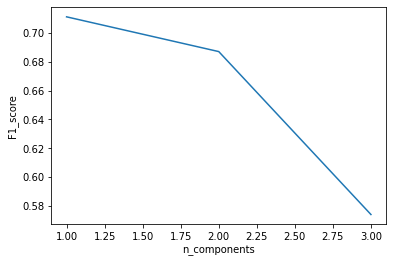

In [ ]:
# Fit Regardless of Classes, Feature V14, V17

print('Model 5: Optimal Threshold of FRC Feature V14, V17:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0

feature_picked = [13, 16]

while(n_components_flag):

  gm_model_5 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_5.fit(creditFraud_trainset.iloc[:, feature_picked].values)
  gm_ss = gm_model_5.score_samples(creditFraud_valset.iloc[:, feature_picked].values)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_5 = best_n_components
best_AUC_model_5 = best_AUC
best_F1_model_5 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_5, '  Best AUC:',best_AUC_model_5, ' Best F1 Score:',best_F1_model_5)

## Model 6 : Fit on both classes, Feature V14, V17, V10

Model 6: Optimal Threshold of FRC Feature V14, V17, V10:

----------------------------------------------------------

Current n_components: 1
AUC:  0.9549817378153543  Max F1 score:  0.5289256198347108 

Current n_components: 2
AUC:  0.9521257126940903  Max F1 score:  0.5409836065573771 

Current n_components: 3
AUC:  0.9531418725755104  Max F1 score:  0.5084745762711865 

Current n_components: 4
AUC:  0.9516900656374898  Max F1 score:  0.5128205128205128 

Current n_components: 5
AUC:  0.9504226651242311  Max F1 score:  0.5084745762711865 

----------------------------------------------------------

Best n_components: 2   Best AUC: 0.9521257126940903  Best F1 Score: 0.5409836065573771


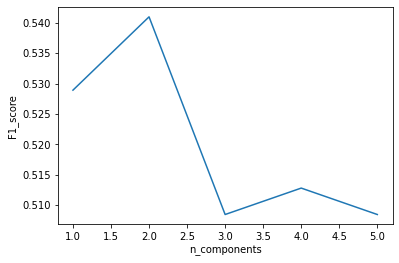

In [ ]:
# Fit Regardless of Classes, Feature V14, V17, V10

print('Model 6: Optimal Threshold of FRC Feature V14, V17, V10:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0

feature_picked = [13, 16, 9]

while(n_components_flag):

  gm_model_6 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_6.fit(creditFraud_trainset.iloc[:, feature_picked].values)
  gm_ss = gm_model_6.score_samples(creditFraud_valset.iloc[:, feature_picked].values)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_6 = best_n_components
best_AUC_model_6 = best_AUC
best_F1_model_6 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_6, '  Best AUC:',best_AUC_model_6, ' Best F1 Score:',best_F1_model_6)

## Model 7 : Fit on both classes, Feature V14, V17, V10, V12

Model 7: Optimal Threshold of FRC Feature V14, V17, V10, V12:

----------------------------------------------------------

Current n_components: 1
AUC:  0.9434974515521983  Max F1 score:  0.5691056910569106 

Current n_components: 2
AUC:  0.9452249933340751  Max F1 score:  0.6386554621848739 

Current n_components: 3
AUC:  0.9440930108215428  Max F1 score:  0.6101694915254238 

Current n_components: 4
AUC:  0.9465063905399154  Max F1 score:  0.5156250000000001 

----------------------------------------------------------

Best n_components: 2   Best AUC: 0.9452249933340751  Best F1 Score: 0.6386554621848739


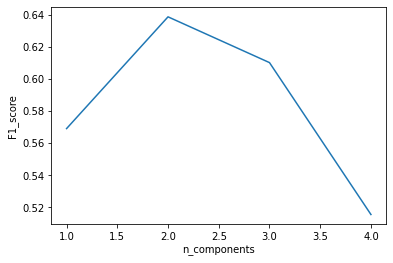

In [ ]:
# Fit Regardless of Classes, Feature V14, V17, V10, V12

print('Model 7: Optimal Threshold of FRC Feature V14, V17, V10, V12:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0

feature_picked = [13, 16, 9, 11]

while(n_components_flag):

  gm_model_7 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_7.fit(creditFraud_trainset.iloc[:, feature_picked].values)
  gm_ss = gm_model_7.score_samples(creditFraud_valset.iloc[:, feature_picked].values)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_7 = best_n_components
best_AUC_model_7 = best_AUC
best_F1_model_7 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_7, '  Best AUC:',best_AUC_model_7, ' Best F1 Score:',best_F1_model_7)

## Model 8 : Fit on both classes, Feature V14, V17, V10, V12, V16

Model 8: Optimal Threshold of FRC Feature V14, V17, V10, V12, V16:

----------------------------------------------------------

Current n_components: 1
AUC:  0.949166112047723  Max F1 score:  0.578125 

Current n_components: 2
AUC:  0.948003686728826  Max F1 score:  0.5094339622641508 

Current n_components: 3
AUC:  0.9464745480642924  Max F1 score:  0.512396694214876 

Current n_components: 4
AUC:  0.9414686309625035  Max F1 score:  0.6610169491525423 

Current n_components: 5
AUC:  0.938161212505485  Max F1 score:  0.4724409448818898 

Current n_components: 6
AUC:  0.9356257116443385  Max F1 score:  0.35294117647058826 

----------------------------------------------------------

Best n_components: 4   Best AUC: 0.9414686309625035  Best F1 Score: 0.6610169491525423


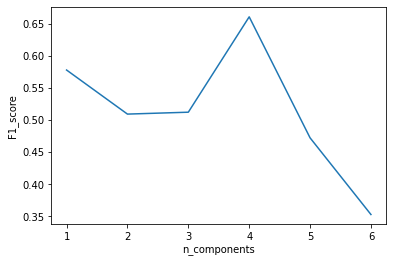

In [ ]:
# Fit Regardless of Classes, Feature V14, V17, V10, V12, V16

print('Model 8: Optimal Threshold of FRC Feature V14, V17, V10, V12, V16:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0

feature_picked = [13, 16, 9, 11, 15]

while(n_components_flag):

  gm_model_8 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_8.fit(creditFraud_trainset.iloc[:, feature_picked].values)
  gm_ss = gm_model_8.score_samples(creditFraud_valset.iloc[:, feature_picked].values)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_8 = best_n_components
best_AUC_model_8 = best_AUC
best_F1_model_8 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_8, '  Best AUC:',best_AUC_model_8, ' Best F1 Score:',best_F1_model_8)

## Model 9 : Fit on Non-Fraudulent transactions, Feature V14, V17

Model 9: Optimal Threshold of FBC Feature V14, V17:

----------------------------------------------------------

Current n_components: 1
AUC:  0.9399888306393198  Max F1 score:  0.7022900763358778 

Current n_components: 2
AUC:  0.9430695026765175  Max F1 score:  0.7419354838709676 

Current n_components: 3
AUC:  0.9419077771922495  Max F1 score:  0.7022900763358778 

Current n_components: 4
AUC:  0.9366415216084438  Max F1 score:  0.6559999999999999 

----------------------------------------------------------

Best n_components: 2   Best AUC: 0.9430695026765175  Best F1 Score: 0.7419354838709676


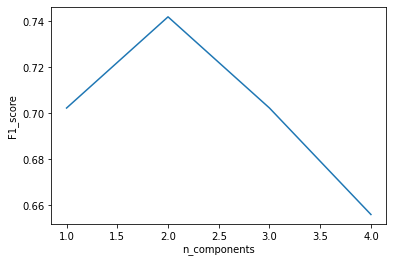

In [ ]:
# Fit on Non-Fraudulent transactions, Feature V14, V17

print('Model 9: Optimal Threshold of FBC Feature V14, V17:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0

feature_picked = [13, 16]

while(n_components_flag):

  gm_model_9 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_9.fit(creditFraud_nonfaud_trainset.iloc[:, feature_picked].values)
  gm_ss = gm_model_9.score_samples(creditFraud_valset.iloc[:, feature_picked].values)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_9 = best_n_components
best_AUC_model_9 = best_AUC
best_F1_model_9 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_9, '  Best AUC:',best_AUC_model_9, ' Best F1 Score:',best_F1_model_9)

## Model 10 : Fit on Non-Fraudulent transactions, Feature V14, V17, V10



Model 10: Optimal Threshold of FBC Feature V14, V17, V10:

----------------------------------------------------------

Current n_components: 1
AUC:  0.950208865645048  Max F1 score:  0.5981308411214953 

Current n_components: 2
AUC:  0.953094283820733  Max F1 score:  0.689655172413793 

Current n_components: 3
AUC:  0.9508107234260544  Max F1 score:  0.7244094488188977 

Current n_components: 4
AUC:  0.9534851414610727  Max F1 score:  0.7419354838709676 

Current n_components: 5
AUC:  0.9525792055337324  Max F1 score:  0.71875 

Current n_components: 6
AUC:  0.9507137963299273  Max F1 score:  0.7086614173228347 

----------------------------------------------------------

Best n_components: 4   Best AUC: 0.9534851414610727  Best F1 Score: 0.7419354838709676


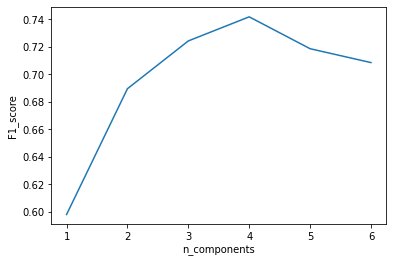

In [ ]:
# Fit on Non-Fraudulent transactions, Feature V14, V17, V10

print('Model 10: Optimal Threshold of FBC Feature V14, V17, V10:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0

feature_picked = [13, 16, 9]

while(n_components_flag):

  gm_model_10 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_10.fit(creditFraud_nonfaud_trainset.iloc[:, feature_picked].values)
  gm_ss = gm_model_10.score_samples(creditFraud_valset.iloc[:, feature_picked].values)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_10 = best_n_components
best_AUC_model_10 = best_AUC
best_F1_model_10 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_10, '  Best AUC:',best_AUC_model_10, ' Best F1 Score:',best_F1_model_10)

## Model 11 : Fit on Non-Fraudulent transactions, Feature V14, V17, V10, V12

Model 11: Optimal Threshold of FBC Feature V14, V17, V10, V12:

----------------------------------------------------------

Current n_components: 1
AUC:  0.9408772707009334  Max F1 score:  0.649122807017544 

Current n_components: 2
AUC:  0.9458048063242657  Max F1 score:  0.7213114754098361 

Current n_components: 3
AUC:  0.9470767557626133  Max F1 score:  0.5849056603773585 

Current n_components: 4
AUC:  0.9477325008100586  Max F1 score:  0.7301587301587301 

Current n_components: 5
AUC:  0.950085344833016  Max F1 score:  0.7040000000000001 

Current n_components: 6
AUC:  0.9511616904925366  Max F1 score:  0.7142857142857143 

Current n_components: 7
AUC:  0.9491664619650376  Max F1 score:  0.7142857142857143 

----------------------------------------------------------

Best n_components: 4   Best AUC: 0.9477325008100586  Best F1 Score: 0.7301587301587301


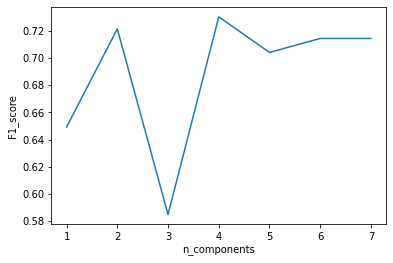

In [ ]:
# Fit on Non-Fraudulent transactions, Feature V14, V17, V10, V12

print('Model 11: Optimal Threshold of FBC Feature V14, V17, V10, V12:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0

feature_picked = [13, 16, 9, 11]

while(n_components_flag):

  gm_model_11 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_11.fit(creditFraud_nonfaud_trainset.iloc[:, feature_picked].values)
  gm_ss = gm_model_11.score_samples(creditFraud_valset.iloc[:, feature_picked].values)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_11 = best_n_components
best_AUC_model_11 = best_AUC
best_F1_model_11 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_11, '  Best AUC:',best_AUC_model_11, ' Best F1 Score:',best_F1_model_11)

## Model 12 : Fit on Non-Fraudulent transactions, Feature V14, V17, V10, V12, V16

Model 12: Optimal Threshold of FBC Feature V14, V17, V10, V12, V16:

----------------------------------------------------------

Current n_components: 1
AUC:  0.9482377814122523  Max F1 score:  0.7008547008547008 

Current n_components: 2
AUC:  0.9511466440480114  Max F1 score:  0.7130434782608694 

Current n_components: 3
AUC:  0.9527905555917137  Max F1 score:  0.7175572519083969 

Current n_components: 4
AUC:  0.9329344975782222  Max F1 score:  0.640625 

Current n_components: 5
AUC:  0.9371377043604596  Max F1 score:  0.6984126984126985 

Current n_components: 6
AUC:  0.9423805154841911  Max F1 score:  0.7040000000000001 

Current n_components: 7
AUC:  0.9432976487655967  Max F1 score:  0.7040000000000001 

----------------------------------------------------------

Best n_components: 3   Best AUC: 0.9527905555917137  Best F1 Score: 0.7175572519083969


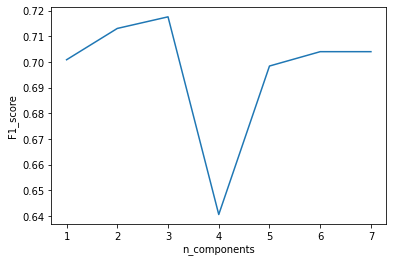

In [ ]:
# Fit on Non-Fraudulent transactions, Feature V14, V17, V10, V12, V16

print('Model 12: Optimal Threshold of FBC Feature V14, V17, V10, V12, V16:\n')
print('----------------------------------------------------------\n')

# Use a loop to find the best Gaussian mixture model number of components

n_components_flag = 1
best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

current_n_components = 1
current_F1 = 0
cache_F1 = 0

feature_picked = [13, 16, 9, 11, 15]

while(n_components_flag):

  gm_model_12 = GaussianMixture(n_components = current_n_components, covariance_type = 'full', random_state = 0)

  print('Current n_components:',current_n_components)

  # Find a rough best threshold without traversing every threshold

  gm_model_12.fit(creditFraud_nonfaud_trainset.iloc[:, feature_picked].values)
  gm_ss = gm_model_12.score_samples(creditFraud_valset.iloc[:, feature_picked].values)
  gm_fpr, gm_tpr, _ = roc_curve(y_val, 1 - gm_ss)
  current_AUC = auc(gm_fpr, gm_tpr)

  F1_score_rough = []
  step_len_rough = 146

  for counter2 in range(step_len_rough, len(creditFraud_valset), step_len_rough):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_rough.append(F1)

  rough_list = range(step_len_rough, len(creditFraud_valset), step_len_rough)
  F1_score_rough_index = np.argmax(F1_score_rough)
  F1_score_rough_max = F1_score_rough[F1_score_rough_index]
  rough_counter = rough_list[F1_score_rough_index]
  #print('Rough Threshold: ',sorted(gm_ss)[rough_counter],'    F1 score: ', F1_score_rough_max)

  #F1_data_rough = {'counter': rough_list, 'F1_score': F1_score_rough}
  #F1_plot1_rough = pd.DataFrame(F1_data_rough)
  #sns.lineplot(data = F1_plot1_rough, x = 'counter', y='F1_score')

  # Search for the percise threshold in a smaller range around the rough threshold we found above

  F1_score_precise = []
  range_len_precise = step_len_rough

  for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
    gm_ss_sorted = sorted(gm_ss)[counter2]
    y_val_pre = []

    for counter3 in range(len(y_val)):
      if gm_ss[counter3] < gm_ss_sorted:
        y_val_pre.append(1)
      else:
        y_val_pre.append(0)
      
    F1 = f1_score(y_val, y_val_pre) 
    F1_score_precise.append(F1)

  precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
  F1_score_precise_index = np.argmax(F1_score_precise)
  F1_score_precise_max = F1_score_precise[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]
  print('AUC: ',current_AUC,' Max F1 score: ', F1_score_precise_max,'\n')

  #F1_data_precise = {'counter': precise_list, 'F1_score': F1_score_precise}
  #F1_plot1_precise = pd.DataFrame(F1_data_precise)
  #sns.lineplot(data = F1_plot1_precise, x = 'counter', y='F1_score')

  # Record parameter and check if it is the best
  current_F1 = F1_score_precise_max
  F1_score_list.append(current_F1)
  n_components_list.append(current_n_components)

  if(current_F1 > best_F1): # if F1 ↗, record best F1, clear cache F1
    best_F1 = current_F1
    best_AUC = current_AUC
    best_n_components = current_n_components
    cache_F1 = 0
  elif(cache_F1 == 0):  # if F1 ↘ for the 1st time, record current F1 to cache F1
    cache_F1 = current_F1
  elif( (cache_F1 != 0) & (current_F1 > cache_F1) ): # if F1 ↘↗, record current F1 to cache F1, since there could be one last chance 
    cache_F1 = current_F1
  else:   # if F1 ↘↘ for the 2nd time, we suppose F1 will never rise again, searching stop
    n_components_flag = 0

  current_n_components += 1

best_n_components_model_12 = best_n_components
best_AUC_model_12 = best_AUC
best_F1_model_12 = best_F1


# Table and Plot for different n_components
print('----------------------------------------------------------\n')

F1_n_data = {'n_components': n_components_list, 'F1_score': F1_score_list}
F1_n_plot = pd.DataFrame(F1_n_data)
sns.lineplot(data = F1_n_plot, x = 'n_components', y='F1_score')

print('Best n_components:',best_n_components_model_12, '  Best AUC:',best_AUC_model_12, ' Best F1 Score:',best_F1_model_12)

## Analysis of Model 1-12

In [ ]:
## Put all the data of Model 1-12 into a table for analysis

model_list = list(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11', 'Model 12'])
n_components_list = list([best_n_components_model_1, best_n_components_model_2, best_n_components_model_3, best_n_components_model_4, best_n_components_model_5, best_n_components_model_6, \
                          best_n_components_model_7, best_n_components_model_8, best_n_components_model_9, best_n_components_model_10, best_n_components_model_11, best_n_components_model_12])
AUC_list = list([best_AUC_model_1, best_AUC_model_2, best_AUC_model_3, best_AUC_model_4, best_AUC_model_5, best_AUC_model_6, \
                 best_AUC_model_7, best_AUC_model_8, best_AUC_model_9, best_AUC_model_10, best_AUC_model_11, best_AUC_model_12])
F1_list = list([best_F1_model_1, best_F1_model_2, best_F1_model_3, best_F1_model_4, best_F1_model_5, best_F1_model_6, \
                best_F1_model_7, best_F1_model_8, best_F1_model_9, best_F1_model_10, best_F1_model_11, best_F1_model_12])

model_final_data = {'Model': model_list, 'Best n_components':n_components_list, 'AUC':AUC_list, 'Best F1 Score':F1_list}
model_final_table = pd.DataFrame(data = model_final_data)
model_final_table.sort_values(by = ['Best F1 Score', 'AUC'], ascending = False)

,Model,Best n_components,AUC,Best F1 Score
9,Model 10,4,0.953485,0.741935
8,Model 9,2,0.943070,0.741935
10,Model 11,4,0.947733,0.730159
11,Model 12,3,0.952791,0.717557
4,Model 5,1,0.942924,0.711111
7,Model 8,4,0.941469,0.661017
6,Model 7,2,0.945225,0.638655
1,Model 2,1,0.938073,0.590164
3,Model 4,1,0.938072,0.590164
5,Model 6,2,0.952126,0.540984


According to the table above, we could see that Model 10 has the best performance among all the models. At this point, we could say that models fitting on Non-Fraudulent transactions (Model 9-12) have significant better performance than models fitting on full trainset (Model 5-8).

Here is the best-performance model:

**Model 10**

**Fit on Non-Fraudulent transactions**

**3 Features: V14, V17, V10**

**Number of Components: 4**

**AUC: 0.953485**

**F1 Score: 0.741935**

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


In [ ]:
### YOUR CODE HERE ###

# Fit on Non-Fraudulent transactions, Feature V14, V17, V10

print('Model 10: \nOptimal Threshold of FBC Feature V14, V17, V10')
print('n_components:', 4)

best_n_components = 1
best_F1 = 0

F1_score_list = []
n_components_list = []

feature_picked = [13, 16, 9]

gm_model_10 = GaussianMixture(n_components = 4, covariance_type = 'full', random_state = 0)

# Find a rough best threshold without traversing every threshold

gm_model_10.fit(creditFraud_nonfaud_trainset.iloc[:, feature_picked].values)

# !! Notice that here we apply model to test set !!

gm_ss = gm_model_10.score_samples(creditFraud_testset.iloc[:, feature_picked].values)
gm_fpr, gm_tpr, _ = roc_curve(y_test, 1 - gm_ss)
current_AUC = auc(gm_fpr, gm_tpr)

F1_score_rough = []
step_len_rough = 146

for counter2 in range(step_len_rough, len(creditFraud_testset), step_len_rough):
  gm_ss_sorted = sorted(gm_ss)[counter2]
  y_test_pre = []

  for counter3 in range(len(y_test)):
    if gm_ss[counter3] < gm_ss_sorted:
      y_test_pre.append(1)
    else:
      y_test_pre.append(0)
      
  F1 = f1_score(y_test, y_test_pre) 
  F1_score_rough.append(F1)

rough_list = range(step_len_rough, len(creditFraud_testset), step_len_rough)
F1_score_rough_index = np.argmax(F1_score_rough)
F1_score_rough_max = F1_score_rough[F1_score_rough_index]
rough_counter = rough_list[F1_score_rough_index]

# Search for the percise threshold in a smaller range around the rough threshold we found above

F1_score_precise = []
range_len_precise = step_len_rough

for counter2 in range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise)):
  gm_ss_sorted = sorted(gm_ss)[counter2]
  y_test_pre = []

  for counter3 in range(len(y_test)):
    if gm_ss[counter3] < gm_ss_sorted:
      y_test_pre.append(1)
    else:
      y_test_pre.append(0)
      
  F1 = f1_score(y_test, y_test_pre) 
  F1_score_precise.append(F1)

precise_list = range(int(rough_counter - range_len_precise), int(rough_counter + range_len_precise))
F1_score_precise_index = np.argmax(F1_score_precise)
F1_score_precise_max = F1_score_precise[F1_score_precise_index]


best_AUC_model_10_test = current_AUC
best_F1_model_10_test = F1_score_precise_max


# Test Result Table
print('----------------------------------------------------------\n')

print('Best AUC:',best_AUC_model_10_test, ' Best F1 Score:',best_F1_model_10_test)

precision_Model_10_test = (best_F1_model_10_test*gm_tpr[F1_score_precise_index])/(2*gm_tpr[F1_score_precise_index]-best_F1_model_10_test)
recall_Model_10_test = gm_tpr[F1_score_precise_index]

print('Precision:',precision_Model_10_test, 'Recall:',recall_Model_10_test)

Model 10: 
Optimal Threshold of FBC Feature V14, V17, V10
n_components: 4
----------------------------------------------------------

Best AUC: 0.9681719314291074  Best F1 Score: 0.7577639751552795
Precision: 0.6417401194199601 Recall: 0.925


In [ ]:
dataset_list = list(['Train & Validation Set', 'Test Set'])
n_components_list_test = list([best_n_components_model_10, best_n_components_model_10])
AUC_list_test = list([best_AUC_model_10, best_AUC_model_10_test])
F1_list_test = list([best_F1_model_10, best_F1_model_10_test])

model_test_data = {'Dataset': dataset_list, 'n_components':n_components_list_test, 'AUC':AUC_list_test, 'Best F1 Score':F1_list_test}
model_test_table = pd.DataFrame(data = model_test_data)
model_test_table

,Dataset,n_components,AUC,Best F1 Score
0,Train & Validation Set,4,0.953485,0.741935
1,Test Set,4,0.968172,0.757764


**We could see that Model 10 achieves a little bit higher AUC and F1 score on test set than train & validation set, but it is not a big difference. Therefore we could say that the Model 10 fits well on both train & validation set and test set without overfitting or underfitting problem that worth concerning about.**

## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references. 




# 1. Bernoulli Distribution

A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial. So the random variable X which has a Bernoulli distribution can take value 1 with the probability of success, say p, and the value 0 with the probability of failure, say q or 1-p. Here, the occurrence of a head denotes success, and the occurrence of a tail denotes failure.

There are many examples of Bernoulli distribution such as whether it’s going to rain tomorrow or not where rain denotes success and no rain denotes failure and Winning (success) or losing (failure) the game.


# 2. Binomial Distribution

The Binomial distribution is applied in binary outcomes events where the probability of success is equal to the probability of failure in all the successive trials.

Its example includes tossing a biased/unbiased coin for a repeated number of times or throwing balls into the bin fit the Binomial Distribution. 

The properties of a Binomial Distribution are:

1. Each trial is independent.

2. There are only two possible outcomes in a trial- either a success or a failure.

3. A total number of n identical trials are conducted.

4. The probability of success and failure is same for all trials. (Trials are identical.)

# 3. Poisson Distribution

Poisson distribution outlines the probability for a given number of events that take place in a fixed time period or space, or particularized intervals such as distance, area, volume.

For example, conducting risk analysis by the insurance/banking industry, anticipating the number of car accidents in a particular time interval and in a specific area.

A distribution is called Poisson distribution when the following assumptions are valid:

1. Any successful event should not influence the outcome of another successful event.
2. The probability of success over a short interval must equal the probability of success over a longer interval.
3. The probability of success in an interval approaches zero as the interval becomes smaller.

Some examples are:

1. The number of emergency calls recorded at a hospital in a day.

2. The number of thefts reported in an area on a day.

3. The number of customers arriving at a salon in an hour.

4. The number of suicides reported in a particular city.

5. The number of printing errors at each page of the book.



# 4. Exponential Distribution

The exponential distribution has following characteristics;

1. The higher the rate, the faster the curve drops, and lower the rate, flatter the curve.

2. In survival analysis, λ is termed as a failure rate of a machine at any time t with the assumption that the machine will survive upto t time.

Here is some examples:

1. Interval of time between the calls in a call center.

2. Length of time beteeen metro arrivals.

3. Length of time between arrivals at a gas station.

4. The life of an Air Conditioner

# 5. Multinomial Distribution

The multinomial distribution is used to measure the outcomes of experiments that have two or more variables. It is the special type of binomial distribution when there are two possible outcomes such as true/false or success/failure.

The distribution is commonly used in biological, geological and financial applications. 

A very popular Mendel experiment where two strains of peas (one green and wrinkled seeds and other is yellow and smooth seeds) are hybridized that produced four different strains of seeds-green and wrinkled, green and round, yellow and round, and yellow and wrinkled. This resulted in multinomial distribution and led to the discovery of the basic principles of genetics.

# How to find a suitable distribution to model data

1. Determine whether the data is discrete or continuous in order to find out if we should use discrete or continuous distribution to fit the data.

2. Create a general graph of the data distribution and observe which distribution model would pobably fit the data best.

3. When facing data with complex distribution, try multiple model with different distribution.



# Reference

https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

https://www.analyticssteps.com/blogs/10-types-statistical-data-distribution-models